In [ ]:
print("hello world")

hello world


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import boxcox

from sklearn import preprocessing

from imblearn.over_sampling import RandomOverSampler

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from collections import Counter

In [ ]:
df = pd.read_csv('./sample_data/Churn_Modelling.csv')

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.shape

(10000, 14)

In [ ]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [ ]:
df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [ ]:
print('unique_customers={num}'.format(num=len(df.CustomerId.unique())))

unique_customers=10000


In [ ]:
df=df.drop(labels=['RowNumber','CustomerId','Surname'],axis=1)

In [ ]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
print(len(df[df['Age'] > 81]))

8


In [ ]:
print(len(df[df['EstimatedSalary']<16150]))

800


In [ ]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [ ]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
df = df[df['Age'] < 81]
df = df[df['EstimatedSalary'] > 16150]

In [ ]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,9188.000000,9188.000000,9188.000000,9188.000000,9188.000000,9188.000000,9188.000000,9188.000000,9188.000000
mean,650.880714,38.887244,5.017414,77006.626761,1.529495,0.707880,0.514258,108109.243763,0.204288
std,96.483447,10.366838,2.895127,62334.253076,0.582107,0.454762,0.499824,52805.923116,0.403202
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,16150.340000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,62702.555000,0.000000
50%,652.000000,37.000000,5.000000,97682.815000,1.000000,1.000000,1.000000,107670.630000,0.000000
75%,718.000000,44.000000,8.000000,127803.137500,2.000000,1.000000,1.000000,153290.477500,0.000000
max,850.000000,80.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [ ]:
df.shape

(9188, 11)

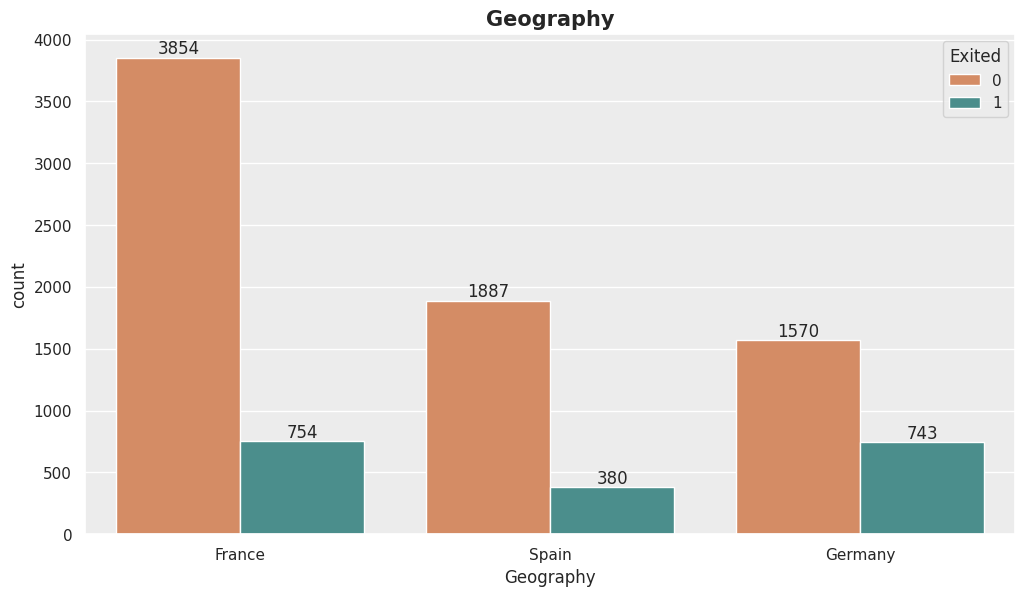

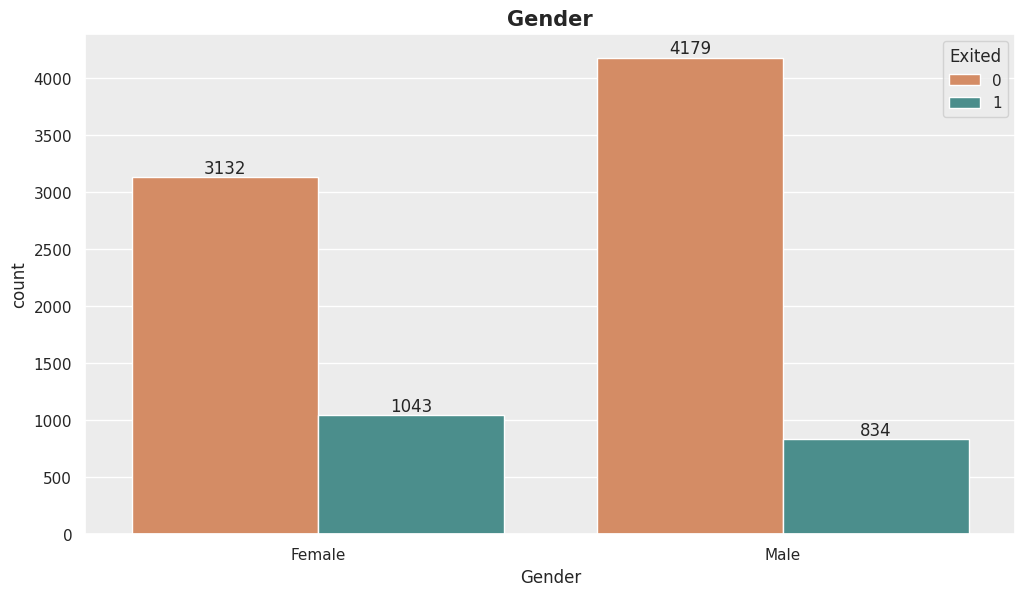

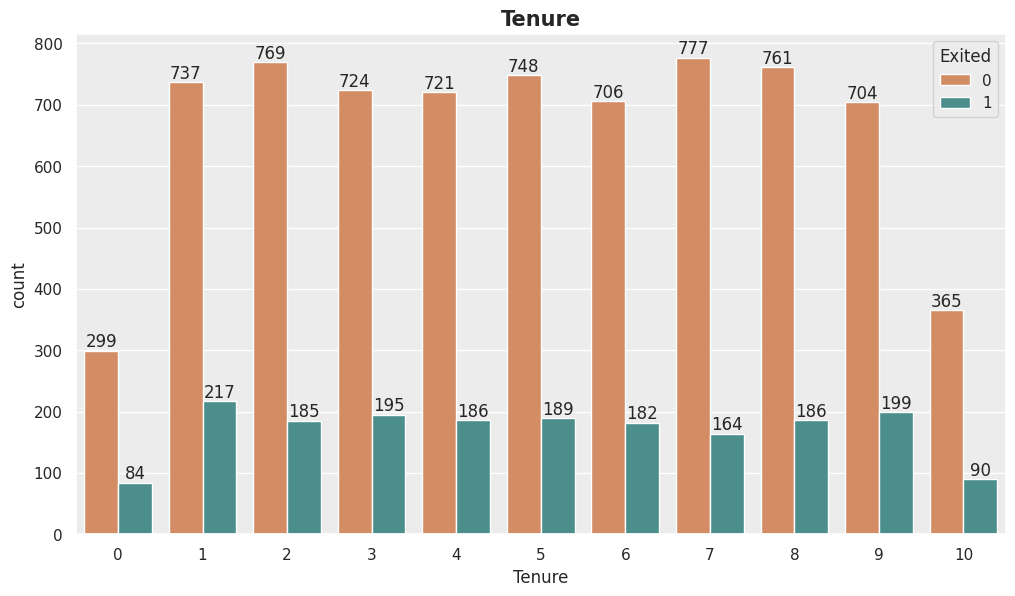

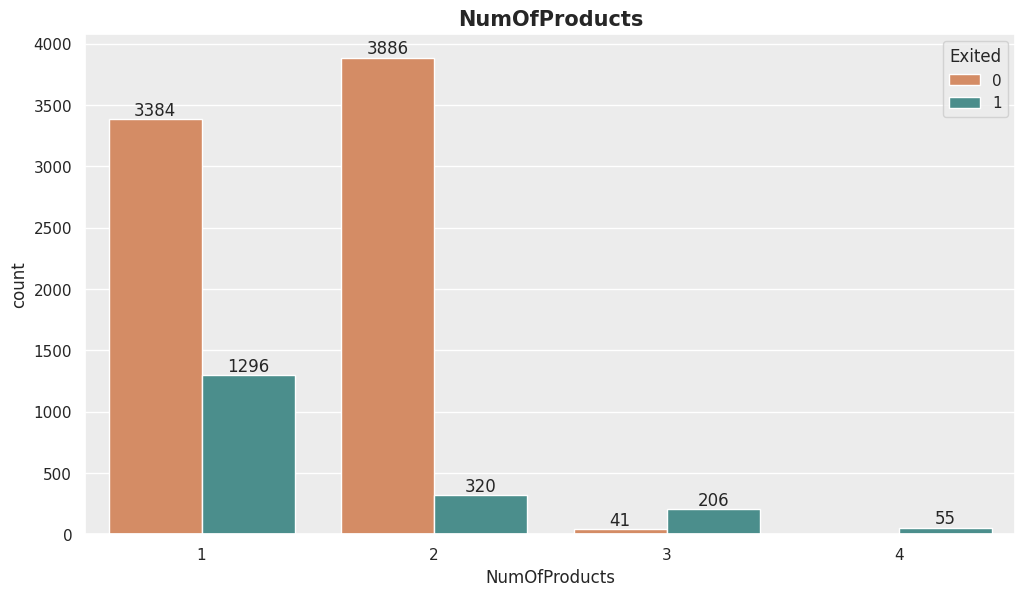

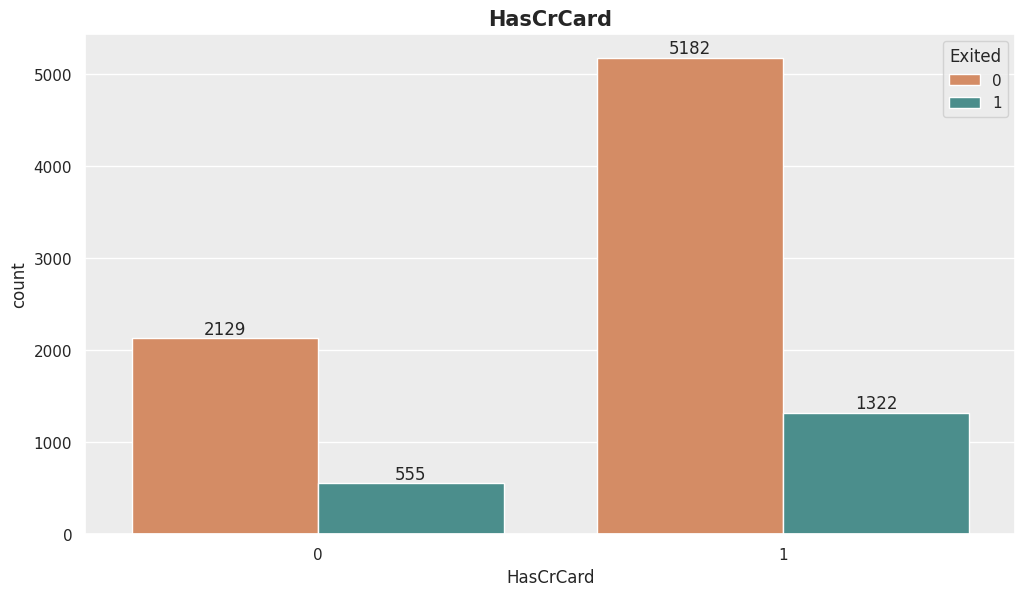

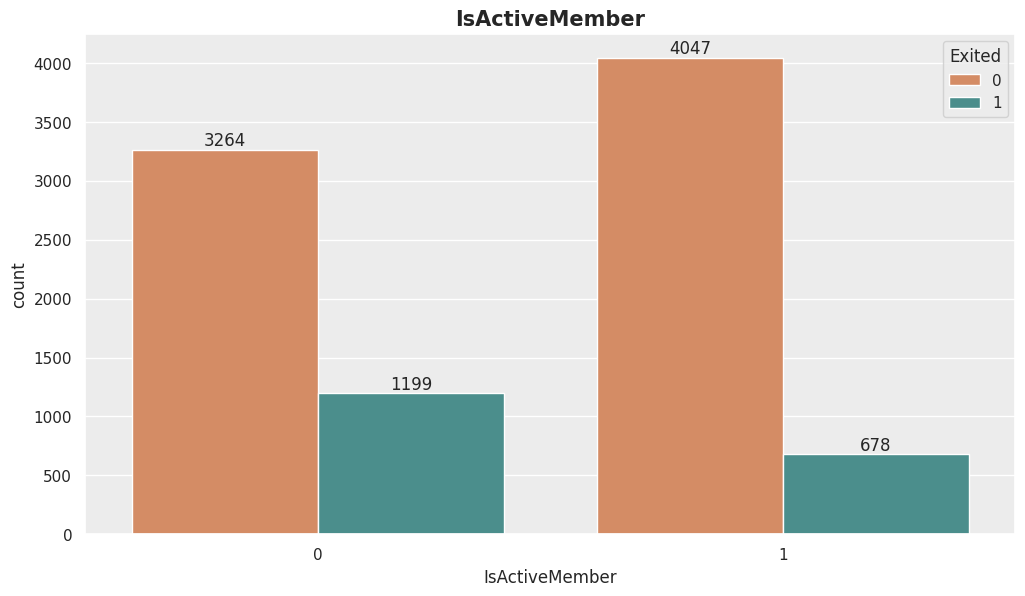

In [ ]:
list_of_cat_features = df[['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']]
palette_features = ['#E68753', '#409996']
sns.set(rc={'axes.facecolor':'#ECECEC'})

for feature in list_of_cat_features:
    plt.figure(figsize=(12,6.5))
    plt.title(feature, fontsize=15, fontweight='bold', ha='center')
    ax = sns.countplot(data = df, x = df[feature], hue = 'Exited', palette=palette_features)
    for container in ax.containers:
        ax.bar_label(container)
    plt.show()

In [ ]:
print(len(df[df['Exited'] == 0]))
print(len(df[df['Exited'] == 1]))

7311
1877


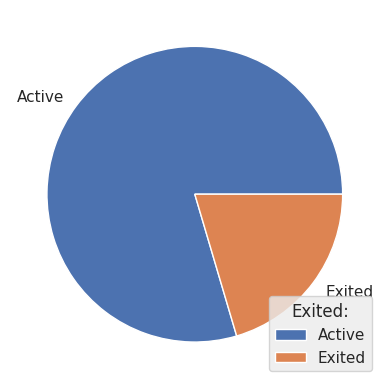

In [ ]:
y = np.array([7311,1877])
mylabels = ["Active", "Exited"]

plt.pie(y, labels = mylabels)
plt.legend(title = "Exited:")
plt.show()

In [ ]:
df['Age'] = boxcox(df['Age'])[0]

In [ ]:
print(len(df.columns))
df.head()

11


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,2.669425,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,2.657617,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,2.669425,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,2.632939,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,2.680902,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,9188.000000,9188.000000,9188.000000,9188.000000,9188.000000,9188.000000,9188.000000,9188.000000,9188.000000
mean,650.880714,2.611706,5.017414,77006.626761,1.529495,0.707880,0.514258,108109.243763,0.204288
std,96.483447,0.128049,2.895127,62334.253076,0.582107,0.454762,0.499824,52805.923116,0.403202
min,350.000000,2.219731,0.000000,0.000000,1.000000,0.000000,0.000000,16150.340000,0.000000
25%,584.000000,2.532969,3.000000,0.000000,1.000000,0.000000,0.000000,62702.555000,0.000000
50%,652.000000,2.606704,5.000000,97682.815000,1.000000,1.000000,1.000000,107670.630000,0.000000
75%,718.000000,2.692065,8.000000,127803.137500,2.000000,1.000000,1.000000,153290.477500,0.000000
max,850.000000,2.965760,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [ ]:
print('Exited = {n1} and Active = {n2}'.format(n1 = len(df[df['Exited']==1]), n2 =len(df[df['Exited']==0])))

Exited = 1877 and Active = 7311


<ipython-input-30-07faab28382d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df['Exited'], data=df, palette=palette_features,legend=False)


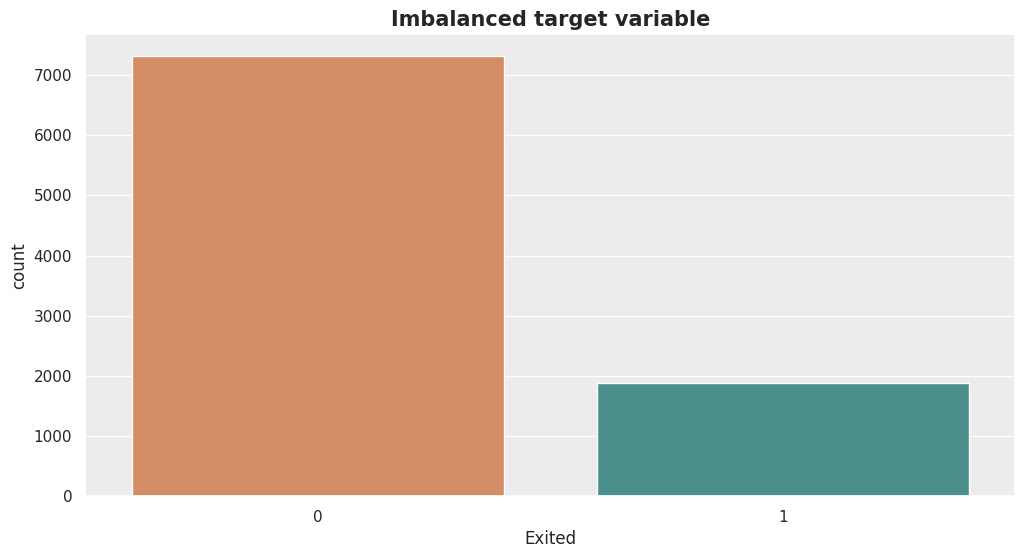

In [ ]:
sns.set(rc={'axes.facecolor':'#ECECEC'})
plt.figure(figsize=(12,6))
plt.title("Imbalanced target variable", fontsize=15, fontweight='bold', ha='center')
ax = sns.countplot(x=df['Exited'], data=df, palette=palette_features,legend=False)

plt.show()

In [ ]:
df = pd.get_dummies(data = df, columns = ['Geography' , 'Gender'])
df.head(10)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,2.669425,2,0.00,1,1,1,101348.88,1,True,False,False,True,False
1,608,2.657617,1,83807.86,1,0,1,112542.58,0,False,False,True,True,False
2,502,2.669425,8,159660.80,3,1,0,113931.57,1,True,False,False,True,False
3,699,2.632939,1,0.00,2,0,0,93826.63,0,True,False,False,True,False
4,850,2.680902,2,125510.82,1,1,1,79084.10,0,False,False,True,True,False
5,645,2.692065,8,113755.78,2,1,0,149756.71,1,False,False,True,False,True
7,376,2.481793,4,115046.74,4,1,0,119346.88,1,False,True,False,True,False
8,501,2.692065,4,142051.07,2,0,1,74940.50,0,True,False,False,False,True
9,684,2.444036,2,134603.88,1,1,1,71725.73,0,True,False,False,False,True
10,528,2.516569,6,102016.72,2,0,0,80181.12,0,True,False,False,False,True


In [ ]:
df.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male'],
      dtype='object')

In [ ]:
columns = ['CreditScore', 'Geography_France', 'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'EstimatedSalary']
y = df['Exited']
X = df[columns]
print(X.head())
print(y.head())
ros = RandomOverSampler(sampling_strategy='minority')
X_train_balanced, y_train_balanced = ros.fit_resample(X, y)
print(f"Imbalanced target class: {(y)}\n\nBalanced target class: {Counter(y_train_balanced)}\n")
print(X_train_balanced.shape[0] - df.shape[0], 'new random picked points')

   CreditScore  Geography_France  Geography_Germany  Geography_Spain  \
0          619              True              False            False   
1          608             False              False             True   
2          502              True              False            False   
3          699              True              False            False   
4          850             False              False             True   

   Gender_Female  Gender_Male       Age  Tenure    Balance  NumOfProducts  \
0           True        False  2.669425       2       0.00              1   
1           True        False  2.657617       1   83807.86              1   
2           True        False  2.669425       8  159660.80              3   
3           True        False  2.632939       1       0.00              2   
4           True        False  2.680902       2  125510.82              1   

   HasCrCard  EstimatedSalary  
0          1        101348.88  
1          0        112542.58  
2       

<ipython-input-34-7e944e87fb7a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=y_train_balanced, data=df, palette=palette_features)


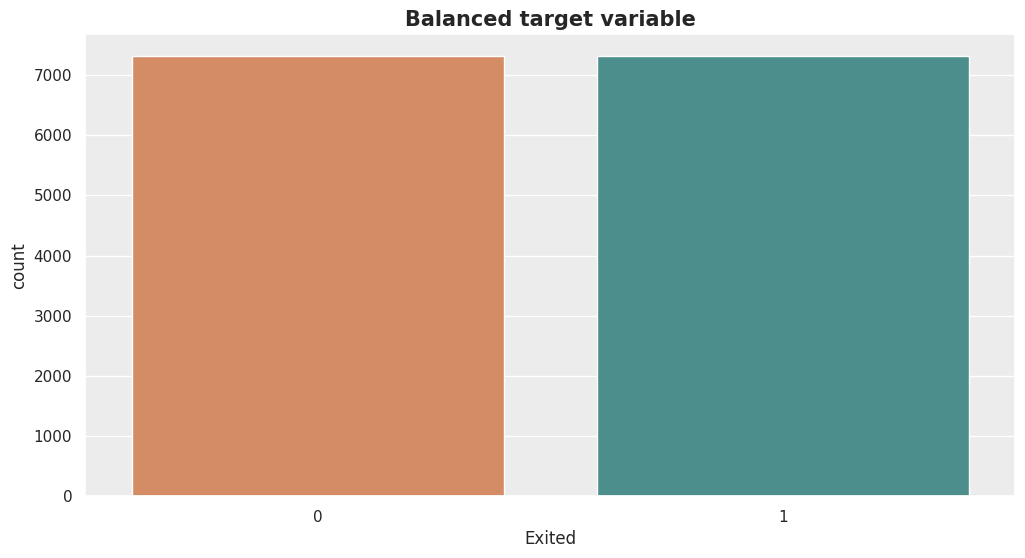

In [ ]:
sns.set(rc={'axes.facecolor':'#ECECEC'})
plt.figure(figsize=(12,6))
plt.title("Balanced target variable", fontsize=15, fontweight='bold', ha='center')
ax = sns.countplot(x=y_train_balanced, data=df, palette=palette_features)
plt.show()

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_train_balanced, y_train_balanced,test_size=0.3, random_state = 1) #70 % of train data, 30 % of test data
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((10235, 12), (4387, 12), (10235,), (4387,))

In [ ]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,2.669425,2,0.00,1,1,1,101348.88,1,True,False,False,True,False
1,608,2.657617,1,83807.86,1,0,1,112542.58,0,False,False,True,True,False
2,502,2.669425,8,159660.80,3,1,0,113931.57,1,True,False,False,True,False
3,699,2.632939,1,0.00,2,0,0,93826.63,0,True,False,False,True,False
4,850,2.680902,2,125510.82,1,1,1,79084.10,0,False,False,True,True,False


In [ ]:
threshold = 0.9
corr_matrix = X_train.corr().abs()
corr_matrix.head(len(columns))

,CreditScore,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Age,Tenure,Balance,NumOfProducts,HasCrCard,EstimatedSalary
CreditScore,1.000000,0.007716,0.000095,0.009040,0.006918,0.006918,0.005389,0.032429,0.013483,0.003089,0.000321,0.029473
Geography_France,0.007716,1.000000,0.617386,0.510035,0.014259,0.014259,0.053332,0.004171,0.259010,0.004913,0.006247,0.005010
Geography_Germany,0.000095,0.617386,1.000000,0.361761,0.028860,0.028860,0.076789,0.008652,0.414827,0.018095,0.023111,0.004235
Geography_Spain,0.009040,0.510035,0.361761,1.000000,0.014658,0.014658,0.020759,0.004517,0.146629,0.013963,0.017867,0.010568
Gender_Female,0.006918,0.014259,0.028860,0.014658,1.000000,1.000000,0.049077,0.016005,0.021431,0.020988,0.001364,0.032355
Gender_Male,0.006918,0.014259,0.028860,0.014658,1.000000,1.000000,0.049077,0.016005,0.021431,0.020988,0.001364,0.032355
Age,0.005389,0.053332,0.076789,0.020759,0.049077,0.049077,1.000000,0.026877,0.032190,0.013652,0.003963,0.004625
Tenure,0.032429,0.004171,0.008652,0.004517,0.016005,0.016005,0.026877,1.000000,0.000359,0.023327,0.026236,0.007232
Balance,0.013483,0.259010,0.414827,0.146629,0.021431,0.021431,0.032190,0.000359,1.000000,0.179410,0.001821,0.010897
NumOfProducts,0.003089,0.004913,0.018095,0.013963,0.020988,0.020988,0.013652,0.023327,0.179410,1.000000,0.009774,0.038009


In [ ]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
upper.head(len(columns))

,CreditScore,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Age,Tenure,Balance,NumOfProducts,HasCrCard,EstimatedSalary
CreditScore,NaN,0.007716,0.000095,0.009040,0.006918,0.006918,0.005389,0.032429,0.013483,0.003089,0.000321,0.029473
Geography_France,NaN,NaN,0.617386,0.510035,0.014259,0.014259,0.053332,0.004171,0.259010,0.004913,0.006247,0.005010
Geography_Germany,NaN,NaN,NaN,0.361761,0.028860,0.028860,0.076789,0.008652,0.414827,0.018095,0.023111,0.004235
Geography_Spain,NaN,NaN,NaN,NaN,0.014658,0.014658,0.020759,0.004517,0.146629,0.013963,0.017867,0.010568
Gender_Female,NaN,NaN,NaN,NaN,NaN,1.000000,0.049077,0.016005,0.021431,0.020988,0.001364,0.032355
Gender_Male,NaN,NaN,NaN,NaN,NaN,NaN,0.049077,0.016005,0.021431,0.020988,0.001364,0.032355
Age,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.026877,0.032190,0.013652,0.003963,0.004625
Tenure,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000359,0.023327,0.026236,0.007232
Balance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.179410,0.001821,0.010897
NumOfProducts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.009774,0.038009


In [ ]:
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

print('There are %d columns to remove,' % (len(to_drop)), 'specifically columns:', str(to_drop))

There are 1 columns to remove, specifically columns: ['Gender_Male']


In [ ]:
X_train = X_train.drop(columns=to_drop)
X_test = X_test.drop(columns=to_drop)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

X_train shape: (10235, 11)
X_test shape: (4387, 11)


In [ ]:
X_test

,CreditScore,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Age,Tenure,Balance,NumOfProducts,HasCrCard,EstimatedSalary
12480,550,False,True,False,True,2.669425,10,128707.31,1,1,63092.65
14394,734,True,False,False,False,2.332919,5,130056.23,1,0,121894.31
153,683,False,False,True,False,2.481793,0,133702.89,1,1,55582.54
7234,641,False,True,False,False,2.532969,5,122947.92,1,1,99154.86
12796,683,False,False,True,False,2.645462,4,95053.10,1,1,116816.54
...,...,...,...,...,...,...,...,...,...,...,...
14047,712,False,True,False,True,2.645462,3,109308.79,2,1,120158.72
202,726,True,False,False,True,2.516569,9,114722.05,2,1,98178.57
2556,733,False,True,False,False,2.620027,9,111347.37,2,0,194872.97
9888,691,False,True,False,True,2.657617,8,109153.96,3,1,148848.76


In [ ]:
df.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male'],
      dtype='object')

[[1804  374]
 [  74 2135]]


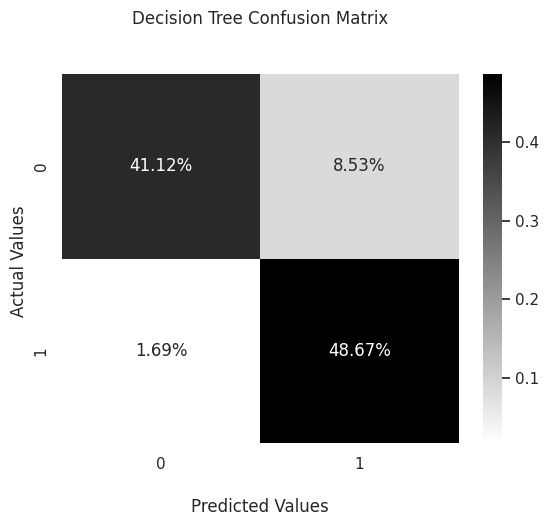

In [ ]:
dtc = DecisionTreeClassifier()
dtc = dtc.fit(X_train,y_train)
y_pred_dtc = dtc.predict(X_test)

cf_matrix_dtc = confusion_matrix(y_test, y_pred_dtc)
print(cf_matrix_dtc)

ax = sns.heatmap(cf_matrix_dtc/np.sum(cf_matrix_dtc), annot=True, fmt='.2%', cmap='binary')
ax.set_title('Decision Tree Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

plt.show()

In [ ]:
print(classification_report(y_test, y_pred_dtc))

print('Accuracy Score : ' + str(round(accuracy_score(y_test,y_pred_dtc),3)))
print('Precision Score : ' + str(round(precision_score(y_test,y_pred_dtc),3)))
print('Recall Score : ' + str(round(recall_score(y_test,y_pred_dtc),3)))
print('F-Score : ' + str(round(f1_score(y_test,y_pred_dtc),3)))

              precision    recall  f1-score   support

           0       0.96      0.83      0.89      2178
           1       0.85      0.97      0.91      2209

    accuracy                           0.90      4387
   macro avg       0.91      0.90      0.90      4387
weighted avg       0.91      0.90      0.90      4387

Accuracy Score : 0.898
Precision Score : 0.851
Recall Score : 0.967
F-Score : 0.905


[[1962  216]
 [  71 2138]]


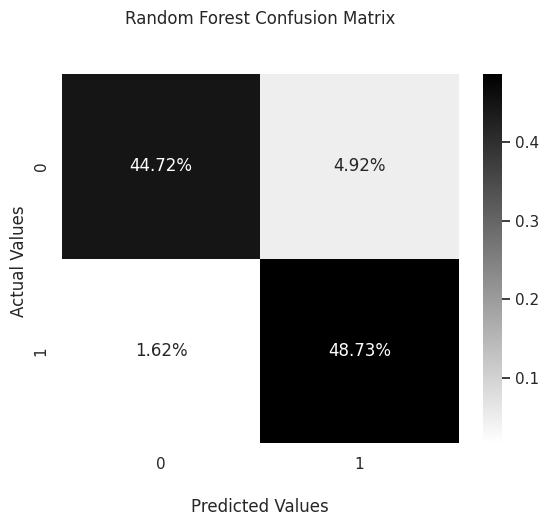

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)

cf_matrix_rfc = confusion_matrix(y_test, y_pred_rfc)
print(cf_matrix_rfc)
ax = sns.heatmap(cf_matrix_rfc/np.sum(cf_matrix_rfc), annot=True, fmt='.2%', cmap='binary')

ax.set_title('Random Forest Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

plt.show()

In [ ]:
print(classification_report(y_test, y_pred_rfc))

print('Accuracy Score : ' + str(round(accuracy_score(y_test,y_pred_rfc),3)))
print('Precision Score : ' + str(round(precision_score(y_test,y_pred_rfc),3)))
print('Recall Score : ' + str(round(recall_score(y_test,y_pred_rfc),3)))
print('F-Score : ' + str(round(f1_score(y_test,y_pred_rfc),3)))

              precision    recall  f1-score   support

           0       0.97      0.90      0.93      2178
           1       0.91      0.97      0.94      2209

    accuracy                           0.93      4387
   macro avg       0.94      0.93      0.93      4387
weighted avg       0.94      0.93      0.93      4387

Accuracy Score : 0.935
Precision Score : 0.908
Recall Score : 0.968
F-Score : 0.937


[[1016 1162]
 [ 729 1480]]


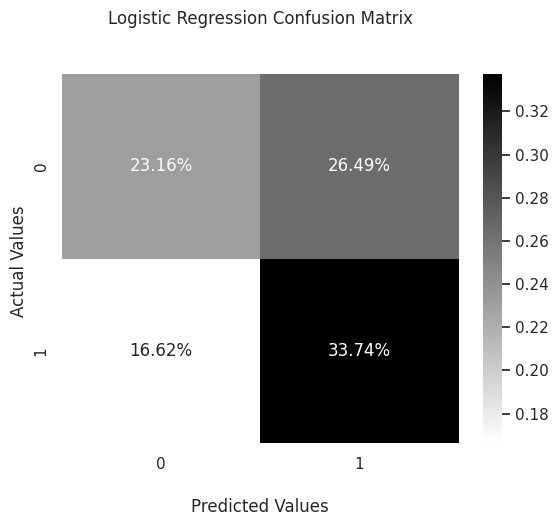

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

cf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
print(cf_matrix_lr)

ax = sns.heatmap(cf_matrix_lr/np.sum(cf_matrix_lr), annot=True, fmt='.2%', cmap='binary')

ax.set_title('Logistic Regression Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

plt.show()

In [ ]:
print(classification_report(y_test, y_pred_lr))
print('Accuracy Score : ' + str(round(accuracy_score(y_test,y_pred_lr),3)))
print('Precision Score : ' + str(round(precision_score(y_test,y_pred_lr),3)))
print('Recall Score : ' + str(round(recall_score(y_test,y_pred_lr),3)))
print('F-Score : ' + str(round(f1_score(y_test,y_pred_lr),3)))

              precision    recall  f1-score   support

           0       0.58      0.47      0.52      2178
           1       0.56      0.67      0.61      2209

    accuracy                           0.57      4387
   macro avg       0.57      0.57      0.56      4387
weighted avg       0.57      0.57      0.56      4387

Accuracy Score : 0.569
Precision Score : 0.56
Recall Score : 0.67
F-Score : 0.61


In [ ]:
accuracies = {"Decision Tree":accuracy_score(y_test,y_pred_dtc), "Random Forest":accuracy_score(y_pred_rfc,y_test), "Logistic Regression":accuracy_score(y_pred_lr,y_test)}
print("The best accuracy  score has the model: ", max(accuracies, key=accuracies.get))
precisions = {"Decision Tree":precision_score(y_test,y_pred_dtc), "Random Forest":precision_score(y_pred_rfc,y_test), "Logistic Regression":precision_score(y_pred_lr,y_test)}
print("The best precision score has the model: ", max(precisions, key=precisions.get))
recalls = {"Decision Tree":recall_score(y_test,y_pred_dtc), "Random Forest":recall_score(y_pred_rfc,y_test), "Logistic Regression":recall_score(y_pred_lr,y_test)}
print("The best recall score has the model: ", max(recalls, key=recalls.get))
f1_scores = {"Decision Tree":f1_score(y_test,y_pred_dtc), "Random Forest":f1_score(y_pred_rfc,y_test), "Logistic Regression":f1_score(y_pred_lr,y_test)}
print("The best f1_score     has the model: ", max(recalls, key=recalls.get))

The best accuracy  score has the model:  Random Forest
The best precision score has the model:  Random Forest
The best recall score has the model:  Decision Tree
The best f1_score     has the model:  Decision Tree


In [ ]:
models_keys             = list(accuracies.keys())
accuracy_models_values  = list(accuracies.values())
precision_models_values = list(precisions.values())
recall_models_values    = list(recalls.values())
f1_score_models_values  = list(recalls.values())
df_models               = pd.DataFrame({"Model":models_keys,
                                       "Accuracy":accuracy_models_values,
                                       "Precision": precision_models_values,
                                       "Recall": recall_models_values,
                                       "F1_Score": f1_score_models_values})
print(df_models)

                 Model  Accuracy  Precision    Recall  F1_Score
0        Decision Tree  0.897880   0.850937  0.966501  0.966501
1        Random Forest  0.934579   0.967859  0.908241  0.908241
2  Logistic Regression  0.568954   0.669986  0.560182  0.560182


In [ ]:
accuracy_models_keys    = list(accuracies.keys())
accuracy_models_values  = list(accuracies.values())

df_accuracy             = pd.DataFrame({"Model":accuracy_models_keys,
                                        "Accuracy":accuracy_models_values})

precision_models_keys   = list(precisions.keys())
precision_models_values = list(precisions.values())
df_precision            = pd.DataFrame({"Model": precision_models_keys,
                                        "Precision": precision_models_values})

recall_models_keys      = list(recalls.keys())
recall_models_values    = list(recalls.values())
df_recall               = pd.DataFrame({"Model": recall_models_keys,
                                        "Recall": recall_models_values})

f1_score_models_keys    = list(f1_scores.keys())
f1_score_models_values  = list(f1_scores.values())
df_f1_score             = pd.DataFrame({"Model": f1_score_models_keys,
                                        "Recall": f1_score_models_values})

<ipython-input-52-68a37bbd1970>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = list(accuracies.keys()), y = list(accuracies.values()), palette = olympic_medals_palette,  edgecolor = olympic_medals_edge_colors, order=df_accuracy.sort_values('Accuracy', ascending=False).Model)


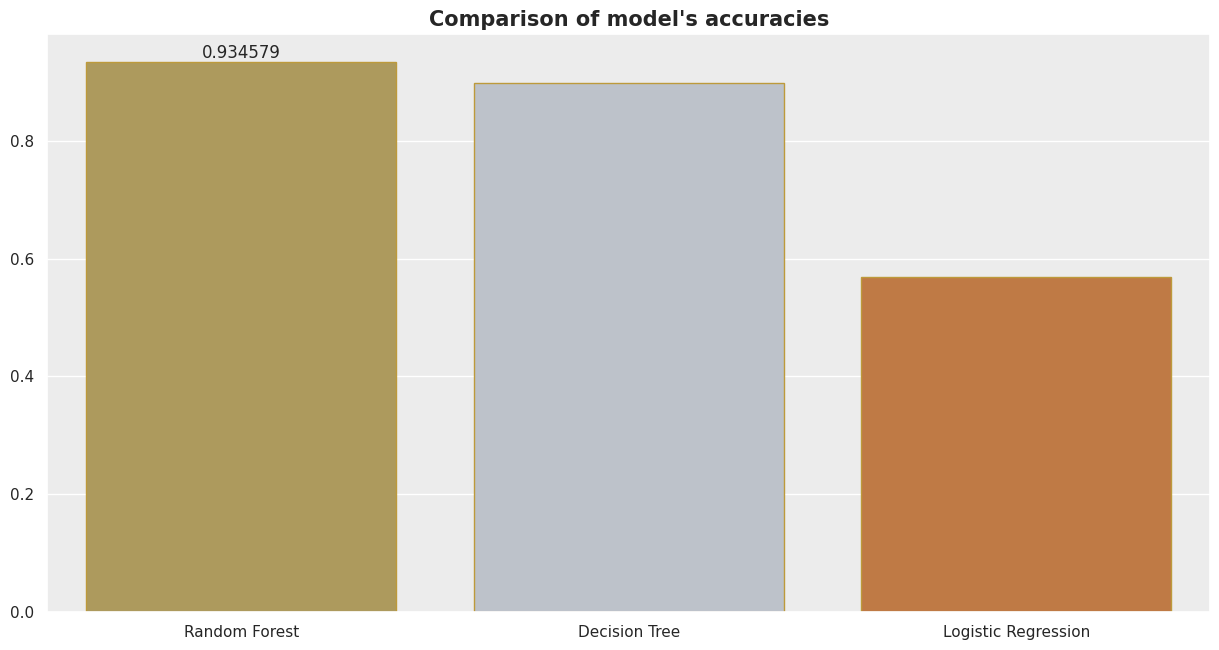

In [ ]:
olympic_medals_palette = ['#BBA14F','#BBC2CC', '#D37731']
olympic_medals_edge_colors = ['#BD9A3B','#AEC3D1', '#D66D20']
sns.set(rc={'axes.facecolor':'#ECECEC'})

plt.figure(figsize = (15,7.5))
ax = sns.barplot(x = list(accuracies.keys()), y = list(accuracies.values()), palette = olympic_medals_palette,  edgecolor = olympic_medals_edge_colors, order=df_accuracy.sort_values('Accuracy', ascending=False).Model)
plt.title(label = "Comparison of model's accuracies", fontsize = 15, fontweight = 'bold', ha = 'center')
ax.bar_label(ax.containers[0], label_type = 'edge', fontsize = 12)

plt.show()

<ipython-input-53-2d7d666ad413>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = list(recalls.keys()), y = list(recalls.values()), palette = olympic_medals_palette,  edgecolor = olympic_medals_edge_colors, order=df_recall.sort_values("Recall", ascending=False).Model)


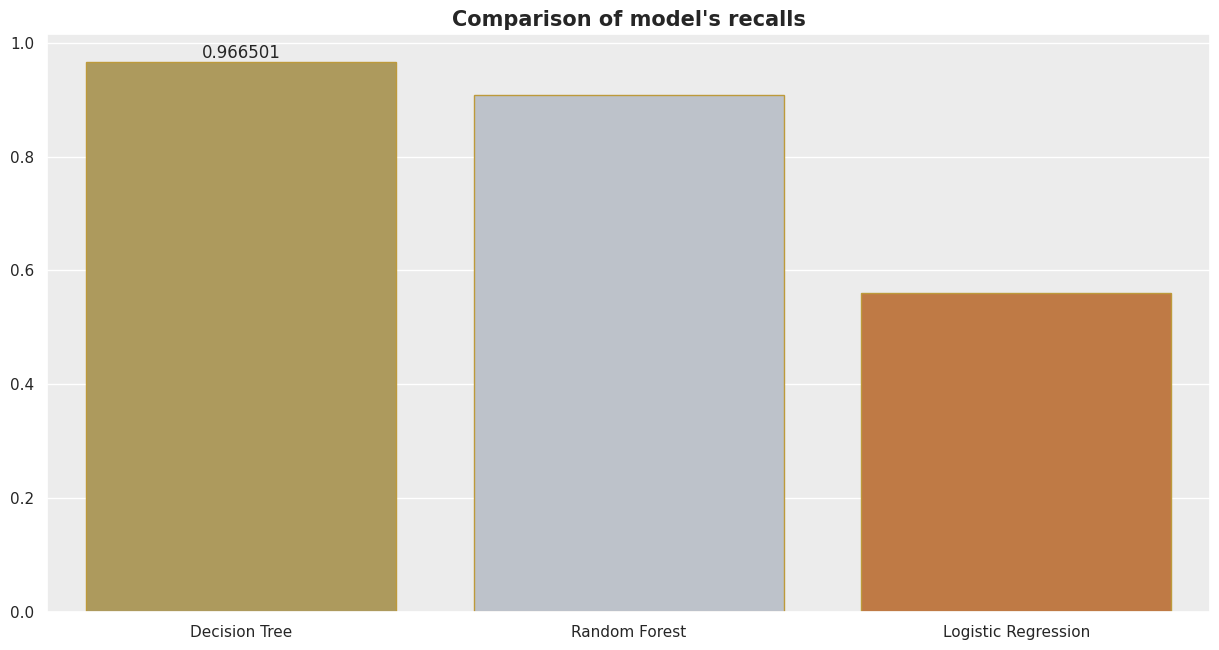

In [ ]:
olympic_medals_palette = ['#BBA14F','#BBC2CC', '#D37731']
olympic_medals_edge_colors = ['#BD9A3B','#AEC3D1', '#D66D20']
sns.set(rc={'axes.facecolor':'#ECECEC'})

plt.figure(figsize = (15,7.5))
ax = sns.barplot(x = list(recalls.keys()), y = list(recalls.values()), palette = olympic_medals_palette,  edgecolor = olympic_medals_edge_colors, order=df_recall.sort_values("Recall", ascending=False).Model)
plt.title(label = "Comparison of model's recalls", fontsize = 15, fontweight = 'bold', ha = 'center')
ax.bar_label(ax.containers[0], label_type = 'edge', fontsize = 12)

plt.show()

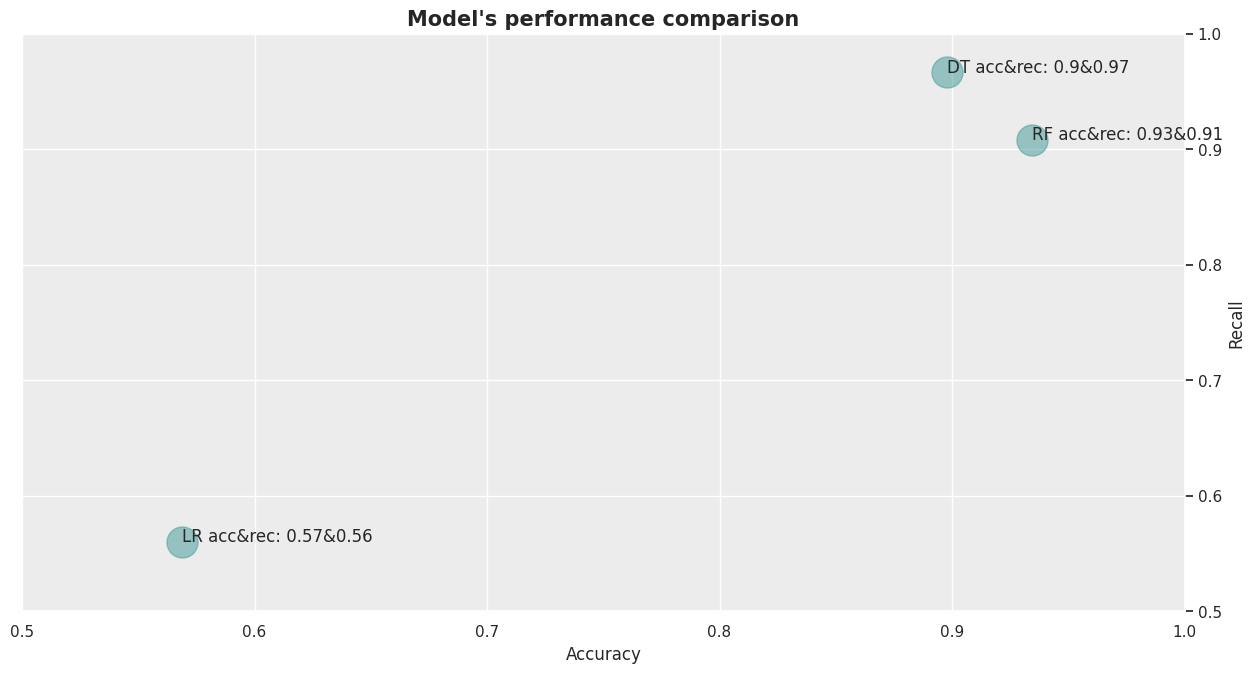

In [ ]:
labels = ["DT acc&rec: " + str(round(accuracy_score(y_test,y_pred_dtc),2)) + "&" + str(round(recall_score(y_test,y_pred_dtc),2)),
          "RF acc&rec: " + str(round(accuracy_score(y_test,y_pred_rfc),2)) + "&" + str(round(recall_score(y_pred_rfc,y_test),2)),
          "LR acc&rec: " + str(round(accuracy_score(y_pred_lr,y_test),2)) + "&" + str(round(recall_score(y_pred_lr,y_test),2))]
x      = [accuracy_score(y_test,y_pred_dtc), accuracy_score(y_pred_rfc,y_test), accuracy_score(y_pred_lr,y_test)]
y      = [recall_score(y_test,y_pred_dtc), recall_score(y_pred_rfc,y_test), recall_score(y_pred_lr,y_test)]

figure = plt.figure(figsize = (15,7.5))
ax     = figure.add_subplot(111)
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
plt.xlim(0.5, 1)
plt.ylim(0.5, 1)
plt.title(label="Model's performance comparison", fontsize = 15, fontweight = 'bold',  ha = 'center')
plt.xlabel('Accuracy')
plt.ylabel('Recall')
plt.scatter(x, y, alpha = 0.5, c='#409996', s=500)
for i in range(len(labels)):
    plt.annotate(labels[i] , (x[i] , y[i]))
plt.show()

In [ ]:
columns = ['CreditScore', 'Geography_France', 'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'EstimatedSalary']
y = df['Exited']
X = df[columns]
ros = RandomOverSampler(sampling_strategy='minority')
X_train_balanced1, y_train_balanced1 = ros.fit_resample(X, y)
print(f"Imbalanced target class: {(y)}\n\nBalanced target class: {Counter(y_train_balanced1)}\n")
print(X_train_balanced1.shape[0] - df.shape[0], 'new random picked points')

Imbalanced target class: 0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 9188, dtype: int64

Balanced target class: Counter({1: 7311, 0: 7311})

5434 new random picked points


In [ ]:
X_train_balanced1.shape

(14622, 12)

In [ ]:
X_train1,X_test1,y_train1,y_test1 = train_test_split(X_train_balanced1, y_train_balanced1,test_size=0.3, random_state = 1) #70 % of train data, 30 % of test data
X_train1.shape,X_test1.shape,y_train1.shape,y_test1.shape

((10235, 12), (4387, 12), (10235,), (4387,))

In [ ]:
X_train1 = X_train1.drop(columns=to_drop)
X_test1 = X_test1.drop(columns=to_drop)
print('X_train shape:', X_train1.shape)
print('X_test shape:', X_test1.shape)

X_train shape: (10235, 11)
X_test shape: (4387, 11)


[[1794  384]
 [  84 2125]]


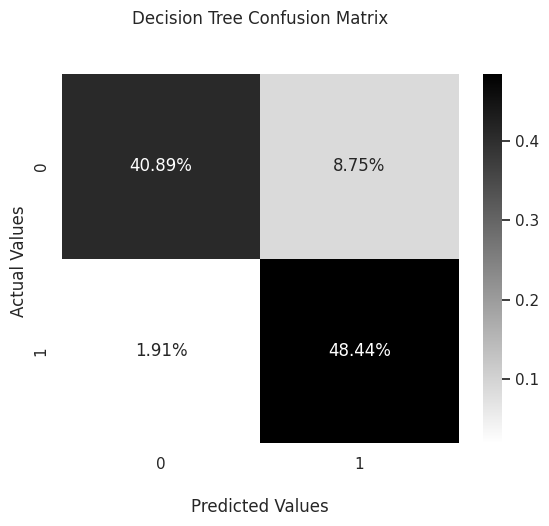

In [ ]:
dtc1 = DecisionTreeClassifier()
dtc1 = dtc1.fit(X_train1,y_train1)
y_pred_dtc1 = dtc1.predict(X_test1)

cf_matrix_dtc1 = confusion_matrix(y_test1, y_pred_dtc1)
print(cf_matrix_dtc1)

ax = sns.heatmap(cf_matrix_dtc1/np.sum(cf_matrix_dtc1), annot=True, fmt='.2%', cmap='binary')
ax.set_title('Decision Tree Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

plt.show()

In [ ]:
print(classification_report(y_test1, y_pred_dtc1))

print('Accuracy Score : ' + str(round(accuracy_score(y_test1,y_pred_dtc1),3)))
print('Precision Score : ' + str(round(precision_score(y_test1,y_pred_dtc1),3)))
print('Recall Score : ' + str(round(recall_score(y_test1,y_pred_dtc1),3)))
print('F-Score : ' + str(round(f1_score(y_test1,y_pred_dtc1),3)))

              precision    recall  f1-score   support

           0       0.96      0.82      0.88      2178
           1       0.85      0.96      0.90      2209

    accuracy                           0.89      4387
   macro avg       0.90      0.89      0.89      4387
weighted avg       0.90      0.89      0.89      4387

Accuracy Score : 0.893
Precision Score : 0.847
Recall Score : 0.962
F-Score : 0.901


[[1961  217]
 [  55 2154]]


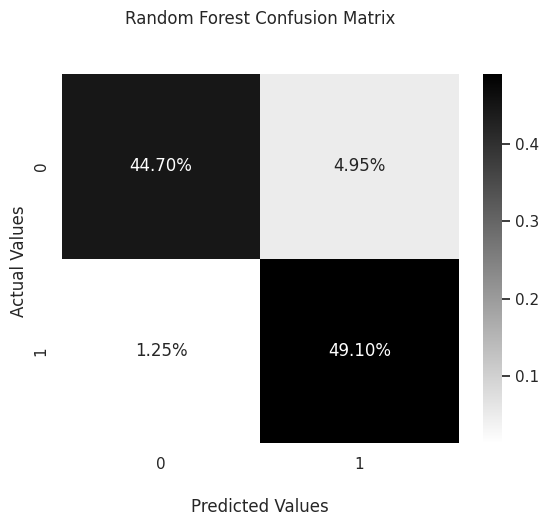

In [ ]:
rfc1 = RandomForestClassifier()
rfc1.fit(X_train1, y_train1)
y_pred_rfc1 = rfc1.predict(X_test1)

cf_matrix_rfc1 = confusion_matrix(y_test1, y_pred_rfc1)
print(cf_matrix_rfc1)
ax = sns.heatmap(cf_matrix_rfc1/np.sum(cf_matrix_rfc1), annot=True, fmt='.2%', cmap='binary')

ax.set_title('Random Forest Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])
plt.show()

In [ ]:
print(classification_report(y_test1, y_pred_rfc1))

print('Accuracy Score : ' + str(round(accuracy_score(y_test1,y_pred_rfc1),3)))
print('Precision Score : ' + str(round(precision_score(y_test1,y_pred_rfc1),3)))
print('Recall Score : ' + str(round(recall_score(y_test1,y_pred_rfc1),3)))
print('F-Score : ' + str(round(f1_score(y_test1,y_pred_rfc1),3)))

              precision    recall  f1-score   support

           0       0.97      0.90      0.94      2178
           1       0.91      0.98      0.94      2209

    accuracy                           0.94      4387
   macro avg       0.94      0.94      0.94      4387
weighted avg       0.94      0.94      0.94      4387

Accuracy Score : 0.938
Precision Score : 0.908
Recall Score : 0.975
F-Score : 0.941


[[1035 1143]
 [ 754 1455]]


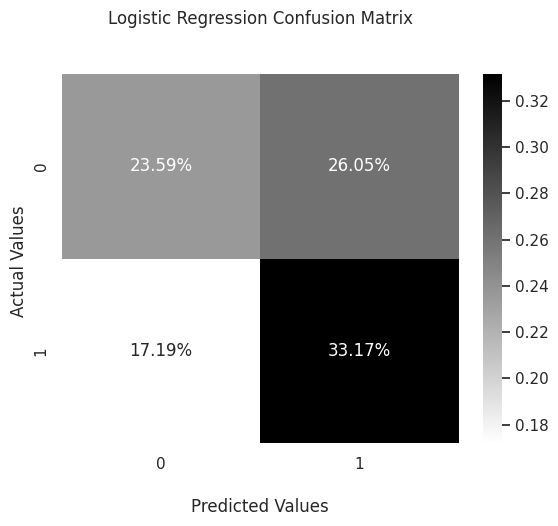

In [ ]:
lr1 = LogisticRegression()
lr1.fit(X_train1, y_train1)
y_pred_lr1 = lr1.predict(X_test1)

cf_matrix_lr1 = confusion_matrix(y_test1, y_pred_lr1)
print(cf_matrix_lr1)

ax = sns.heatmap(cf_matrix_lr1/np.sum(cf_matrix_lr1), annot=True, fmt='.2%', cmap='binary')

ax.set_title('Logistic Regression Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

plt.show()

In [ ]:
print(classification_report(y_test1, y_pred_lr1))
print('Accuracy Score : ' + str(round(accuracy_score(y_test1,y_pred_lr1),3)))
print('Precision Score : ' + str(round(precision_score(y_test1,y_pred_lr1),3)))
print('Recall Score : ' + str(round(recall_score(y_test1,y_pred_lr1),3)))
print('F-Score : ' + str(round(f1_score(y_test1,y_pred_lr1),3)))

              precision    recall  f1-score   support

           0       0.58      0.48      0.52      2178
           1       0.56      0.66      0.61      2209

    accuracy                           0.57      4387
   macro avg       0.57      0.57      0.56      4387
weighted avg       0.57      0.57      0.56      4387

Accuracy Score : 0.568
Precision Score : 0.56
Recall Score : 0.659
F-Score : 0.605


In [ ]:
accuracies1 = {"Decision Tree":accuracy_score(y_test1,y_pred_dtc1), "Random Forest":accuracy_score(y_pred_rfc1,y_test1), "Logistic Regression":accuracy_score(y_pred_lr1,y_test1)}
print("The best accuracy  score has the model: ", max(accuracies1, key=accuracies1.get))
precisions1 = {"Decision Tree":precision_score(y_test1,y_pred_dtc1), "Random Forest":precision_score(y_pred_rfc1,y_test1), "Logistic Regression":precision_score(y_pred_lr1,y_test1)}
print("The best precision score has the model: ", max(precisions1, key=precisions1.get))
recalls1 = {"Decision Tree":recall_score(y_test1,y_pred_dtc1), "Random Forest":recall_score(y_pred_rfc1,y_test1), "Logistic Regression":recall_score(y_pred_lr1,y_test1)}
print("The best recall score has the model: ", max(recalls1, key=recalls1.get))
f1_scores1 = {"Decision Tree":f1_score(y_test1,y_pred_dtc1), "Random Forest":f1_score(y_pred_rfc1,y_test1), "Logistic Regression":f1_score(y_pred_lr1,y_test1)}
print("The best f1_score     has the model: ", max(recalls1, key=recalls1.get))

The best accuracy  score has the model:  Random Forest
The best precision score has the model:  Random Forest
The best recall score has the model:  Decision Tree
The best f1_score     has the model:  Decision Tree


In [ ]:
models_keys1             = list(accuracies1.keys())
accuracy_models_values1  = list(accuracies1.values())
precision_models_values1 = list(precisions1.values())
recall_models_values1    = list(recalls1.values())
f1_score_models_values1  = list(recalls1.values())
df_models1               = pd.DataFrame({"Model":models_keys1,
                                       "Accuracy":accuracy_models_values1,
                                       "Precision": precision_models_values1,
                                       "Recall": recall_models_values1,
                                       "F1_Score": f1_score_models_values1})
print(df_models1)

                 Model  Accuracy  Precision    Recall  F1_Score
0        Decision Tree  0.893321   0.846951  0.961974  0.961974
1        Random Forest  0.937999   0.975102  0.908477  0.908477
2  Logistic Regression  0.567586   0.658669  0.560046  0.560046


In [ ]:
accuracy_models_keys    = list(accuracies.keys())
accuracy_models_values  = list(accuracies.values())

df_accuracy             = pd.DataFrame({"Model":accuracy_models_keys,
                                        "Accuracy":accuracy_models_values})

precision_models_keys   = list(precisions.keys())
precision_models_values = list(precisions.values())
df_precision            = pd.DataFrame({"Model": precision_models_keys,
                                        "Precision": precision_models_values})

recall_models_keys      = list(recalls.keys())
recall_models_values    = list(recalls.values())
df_recall               = pd.DataFrame({"Model": recall_models_keys,
                                        "Recall": recall_models_values})

f1_score_models_keys    = list(f1_scores.keys())
f1_score_models_values  = list(f1_scores.values())
df_f1_score             = pd.DataFrame({"Model": f1_score_models_keys,
                                        "Recall": f1_score_models_values})